In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
X_train = X_train/255.0
X_test = X_test/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

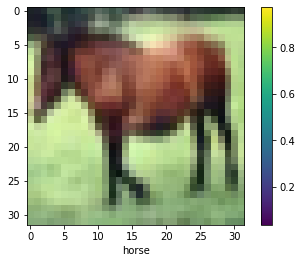

In [5]:
plt.figure()
plt.imshow(X_train[7])
plt.colorbar()
plt.xlabel(class_names[Y_train[7][0]])
plt.show()

In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3))
])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.add(keras.layers.MaxPooling2D(2,2))

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data=(X_test, Y_test))

Epoch 1/10
196/196 [==============================] - 58s 290ms/step - loss: 1.9748 - accuracy: 0.2721 - val_loss: 1.5507 - val_accuracy: 0.4299
Epoch 2/10
196/196 [==============================] - 57s 292ms/step - loss: 1.4547 - accuracy: 0.4713 - val_loss: 1.3351 - val_accuracy: 0.5275
Epoch 3/10
196/196 [==============================] - 57s 293ms/step - loss: 1.3142 - accuracy: 0.5314 - val_loss: 1.2235 - val_accuracy: 0.5672
Epoch 4/10
196/196 [==============================] - 58s 294ms/step - loss: 1.2182 - accuracy: 0.5712 - val_loss: 1.1510 - val_accuracy: 0.5945
Epoch 5/10
196/196 [==============================] - 58s 294ms/step - loss: 1.1244 - accuracy: 0.6027 - val_loss: 1.1563 - val_accuracy: 0.5923
Epoch 6/10
196/196 [==============================] - 57s 293ms/step - loss: 1.0675 - accuracy: 0.6282 - val_loss: 1.0631 - val_accuracy: 0.6267
Epoch 7/10
196/196 [==============================] - 68s 345ms/step - loss: 1.0097 - accuracy: 0.6431 - val_loss: 1.0291 - val_ac

In [16]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.9389 - accuracy: 0.6700
0.6700000166893005


In [17]:
predict = [np.argmax(p) for p in model.predict(X_test, batch_size=256, verbose=2)]

print(predict)

40/40 - 3s
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 4, 9, 6, 7, 9, 6, 5, 7, 8, 6, 7, 2, 0, 9, 4, 2, 4, 0, 9, 6, 6, 4, 2, 3, 9, 6, 4, 9, 9, 5, 0, 6, 7, 6, 0, 9, 3, 3, 7, 6, 9, 8, 6, 3, 8, 8, 7, 3, 3, 3, 7, 3, 6, 0, 6, 2, 1, 0, 3, 7, 2, 3, 8, 8, 9, 2, 0, 3, 3, 8, 8, 1, 1, 7, 2, 7, 2, 0, 9, 9, 0, 4, 8, 6, 4, 6, 6, 0, 0, 3, 4, 7, 6, 3, 1, 1, 2, 6, 8, 7, 4, 0, 2, 2, 1, 3, 0, 7, 6, 5, 8, 7, 2, 2, 8, 2, 8, 3, 3, 2, 4, 1, 8, 9, 1, 2, 9, 7, 4, 8, 6, 5, 6, 5, 8, 2, 6, 6, 5, 5, 8, 9, 6, 0, 0, 6, 2, 9, 3, 4, 0, 1, 6, 6, 0, 2, 8, 4, 7, 0, 9, 6, 0, 8, 9, 9, 3, 7, 5, 0, 8, 5, 2, 6, 4, 8, 6, 2, 3, 8, 4, 8, 0, 1, 7, 6, 8, 8, 7, 8, 5, 0, 8, 7, 1, 3, 8, 5, 7, 9, 7, 9, 5, 9, 8, 0, 3, 9, 0, 4, 4, 4, 9, 3, 4, 9, 3, 2, 3, 6, 3, 1, 5, 8, 8, 0, 4, 0, 3, 3, 1, 1, 8, 9, 0, 2, 4, 8, 2, 0, 7, 5, 9, 9, 4, 0, 6, 0, 8, 1, 8, 1, 3, 3, 0, 8, 2, 4, 7, 2, 2, 2, 6, 5, 8, 2, 0, 7, 4, 3, 9, 0, 6, 1, 0, 9, 1, 8, 7, 9, 1, 2, 6, 1, 3, 2, 6, 0, 0, 6, 6, 6, 5, 2, 2, 1, 8, 2, 1, 4, 8, 6, 0, 0, 3, 0, 7, 7, 5, 5, 3, 3, 6, 2, 5, 1, 7, 5, 4, 6

Pick a number: 10000
Pick a number: 9999


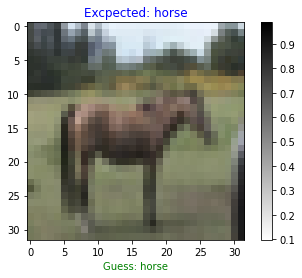

In [18]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label, color='b')
  plt.xlabel("Guess: " + guess, color='g')
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num < len(X_test):
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = X_test[num]
label = Y_test[num][0]
predict(model, image, label)
